In [1]:
import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)
tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward>)
tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01, 

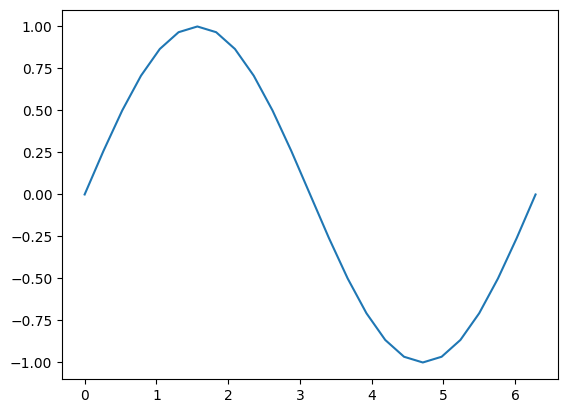

In [6]:
# Autograd.
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

# Note b has a property called SinBackward
print(b)
# Same as c,d. 
c = 2 * b
print(c) # MulBackward0
d = c + 1
print(d) # AddBackward0
out = d.sum()
print(out)

In [9]:
# Use backwar to get derivative
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling backward the first time.

In [19]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
b = torch.sin(a)
c = 2 * b
d = c + 1
out = d.sum()

print('out:')
print(out.grad_fn)
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print(c.grad_fn.next_functions)
print(c.grad_fn.next_functions[0][0].next_functions)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

out:
d:
((<MulBackward0 object at 0x705bbc581290>, 0), (None, 0))
((<SinBackward object at 0x705bbc9df290>, 0), (None, 0))
((<AccumulateGrad object at 0x705bbc85a0d0>, 0),)
()

c:
((<SinBackward object at 0x705bbc580f10>, 0), (None, 0))
((<AccumulateGrad object at 0x705bbc9df290>, 0),)

b:

a:
None


In [27]:
# Define a model to be trained
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.layer1 = torch.nn.Linear(DIM_IN, HIDDEN_SIZE)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(HIDDEN_SIZE, DIM_OUT)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

# We can check the weights and its gradient
print(model.layer2.weight[0][0:10]) # just a small slice
print(model.layer2.weight.grad)

# Define a Eucilidean distance loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
prediction = model(some_input)
loss = (ideal_output - prediction).pow(2).sum()
print(loss)

# Back Propogation
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

# Perform a learning step
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

# 
optimizer.zero_grad()
print('Gradient will accumulate if zero_grad is not called')
print(model.layer2.weight.grad[0][0:10])

for i in range(0, 5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()

print(model.layer2.weight.grad[0][0:10])

optimizer.zero_grad()

print(model.layer2.weight.grad[0][0:10])



tensor([-0.0020, -0.0501, -0.0880, -0.0510,  0.0613, -0.0907, -0.0253, -0.0297,
        -0.0960, -0.0133], grad_fn=<SliceBackward>)
None
tensor(164.7889, grad_fn=<SumBackward0>)
tensor([-0.0020, -0.0501, -0.0880, -0.0510,  0.0613, -0.0907, -0.0253, -0.0297,
        -0.0960, -0.0133], grad_fn=<SliceBackward>)
tensor([-0.4911, -0.5968,  4.0497, -0.7528,  6.0864,  0.0164, -8.2981, -2.9839,
        -0.5534, -0.0699])
tensor([-0.0010, -0.0491, -0.0890, -0.0500,  0.0603, -0.0917, -0.0243, -0.0287,
        -0.0950, -0.0123], grad_fn=<SliceBackward>)
tensor([-0.4911, -0.5968,  4.0497, -0.7528,  6.0864,  0.0164, -8.2981, -2.9839,
        -0.5534, -0.0699])
Gradient will accumulate if zero_grad is not called
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([ -4.9547,   1.5489,  20.4442,   2.3228,  11.5634,  -0.5845, -20.1583,
          5.6239,   7.1089,  -4.0788])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([0.2805, 0.7202, 0.6771, 0.6539, 0.2448], requires_grad=True)
tensor([0.2805, 0.7202, 0.6771, 0.6539, 0.2448])


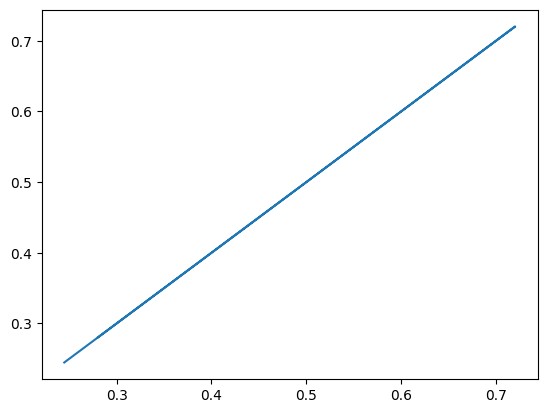

In [33]:
# Autograd can be turned off by changing requires_grad attribute
a = torch.ones(2, 3, requires_grad=True)
print(a)

b1 = 2 * a
print(b1)

a.requires_grad = False
b2 = 2 * a
print(b2)

# Or with a function decorator
def add_tensors1(x, y):
    return x + y

@torch.no_grad()
def add_tensors2(x, y):
    return x + y


a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = add_tensors1(a, b)
print(c1)

c2 = add_tensors2(a, b)
print(c2)

# Get a copy that we do not want to track the gradient
x = torch.rand(5, requires_grad=True)
y = x.detach()

print(x)
print(y)

plt.plot(x.detach(),y) # plotting expects vectors withnot gradients

In [44]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)
# torch.sin_(a). In place operation is not allowed
a = torch.sin(a)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)
tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward>)


In [47]:
#
device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True

x = torch.randn(2, 3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

# Autograd Profiler for performance check. https://pytorch.org/docs/stable/autograd.html#profiler
with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
    for _ in range(1000):
        z = (z / x) * y

print(prf.key_averages().table(sort_by='self_cpu_time_total'))

True
---------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  
Name       Self CPU total %  Self CPU total   CPU total %      CPU total        CPU time avg     CUDA total %     CUDA total       CUDA time avg    Number of Calls  
---------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  
div        48.75%           22.524ms         51.51%           23.798ms         23.798us         48.61%           24.564ms         24.564us         1000             
mul        45.70%           21.114ms         48.49%           22.405ms         22.405us         46.70%           23.598ms         23.598us         1000             
empty      5.55%            2.565ms          5.55%            2.565ms          1.283us          4.68%            2.366ms          1.183us          2000             
----

In [58]:
# Autograd provide ways to compute jacobian, hessian, and etc.
def exp_adder(x, y):
    return 2 * x.exp() + 3 * y

inputs = (torch.rand(1), torch.rand(1)) # arguments for the function
print(inputs)
print(torch.autograd.functional.jacobian(exp_adder, inputs))

print('~~~~~~~~')
inputs = (torch.rand(3), torch.rand(3)) # arguments for the function
print(inputs)
print(exp_adder(inputs[0],inputs[1]))
print(torch.autograd.functional.jacobian(exp_adder, inputs))

print('~~~~~~~~')
def do_some_doubling(x):
    y = x * 2
    while y.data.norm() < 1000:
        y = y * 2
    return y

inputs = torch.randn(3)
my_gradients = torch.tensor([0.1, 1.0, 0.0001])
torch.autograd.functional.vjp(do_some_doubling, inputs, v=my_gradients)

(tensor([0.5156]), tensor([0.1285]))
(tensor([[3.3492]]), tensor([[3.]]))
~~~~~~~~
(tensor([0.1065, 0.8300, 0.4015]), tensor([0.1683, 0.0999, 0.8225]))
tensor([2.7297, 4.8865, 5.4554])
(tensor([[2.2247, 0.0000, 0.0000],
        [0.0000, 4.5867, 0.0000],
        [0.0000, 0.0000, 2.9881]]), tensor([[3., 0., 0.],
        [0., 3., 0.],
        [0., 0., 3.]]))
~~~~~~~~


(tensor([ -782.0106, -1382.7100,   862.1225]),
 tensor([1.0240e+02, 1.0240e+03, 1.0240e-01]))